## To identify Whether the client has subscribed a term deposit or not 
#### Binomial ("yes" or "no")


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bank =pd.read_csv('bank-full.csv', sep =';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [4]:
bank.shape


(45211, 17)

In [5]:
bank = bank.dropna()

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
bank.drop(bank.columns[[1,2, 3,8, 10, 15]], axis = 1, inplace = True)

In [10]:
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,5,261,1,-1,0,no
1,44,no,29,yes,no,5,151,1,-1,0,no
2,33,no,2,yes,yes,5,76,1,-1,0,no
3,47,no,1506,yes,no,5,92,1,-1,0,no
4,33,no,1,no,no,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes
45207,71,no,1729,no,no,17,456,2,-1,0,yes
45208,72,no,5715,no,no,17,1127,5,184,3,yes
45209,57,no,668,no,no,17,508,4,-1,0,no


In [11]:
bank.shape

(45211, 11)

In [12]:
bank= bank.replace({'default': {'yes': 1, 
                                'no': 0}, 
                   'housing': {'yes': 1, 'no': 0},
                   'loan': {'yes': 1, 'no': 0},
                   'y': {'yes': 1, 'no': 0}})

In [13]:
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


In [14]:
X = bank.iloc[:, 1:]
y = bank.iloc[:, 10]

In [15]:
classifier = LogisticRegression()
classifier.fit(X, y)

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = classifier.predict(X)

In [17]:
y_pred_df = pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(X)})

In [18]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


### Creating and assessing the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[39920     2]
 [    0  5289]]


In [20]:
((39920+5289)/(39920+2+0+5289))

0.9999557629780363

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211



### Evaluating the ROC Curve

Text(0, 0.5, 'True Positive Rate')

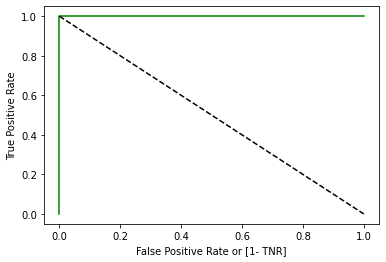

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(X)[:, 1])

auc = roc_auc_score (y, y_pred)

plt.plot(fpr, tpr, color = 'green', label = 'logit model(area= %0.2f)'%auc)
plt.plot([0,1], [1,0], 'k--')
plt.xlabel('False Positive Rate or [1- TNR]')
plt.ylabel('True Positive Rate')

In [23]:
auc
# a high auc of almost 100% states the model is a perfect fit and is able to predict accurately

0.9999749511547518

In [24]:
classifier.predict_proba(X)

array([[9.99998998e-01, 1.00214745e-06],
       [9.99999168e-01, 8.31975589e-07],
       [9.99999933e-01, 6.68863057e-08],
       ...,
       [1.47351106e-06, 9.99998526e-01],
       [9.96358037e-01, 3.64196291e-03],
       [9.95592266e-01, 4.40773404e-03]])

In [25]:
X.info

<bound method DataFrame.info of        default  balance  housing  loan  day  duration  campaign  pdays  \
0            0     2143        1     0    5       261         1     -1   
1            0       29        1     0    5       151         1     -1   
2            0        2        1     1    5        76         1     -1   
3            0     1506        1     0    5        92         1     -1   
4            0        1        0     0    5       198         1     -1   
...        ...      ...      ...   ...  ...       ...       ...    ...   
45206        0      825        0     0   17       977         3     -1   
45207        0     1729        0     0   17       456         2     -1   
45208        0     5715        0     0   17      1127         5    184   
45209        0      668        0     0   17       508         4     -1   
45210        0     2971        0     0   17       361         2    188   

       previous  y  
0             0  0  
1             0  0  
2             0 

### Basis the overall paramters and matrix, we can conclude the prediction is highly accurate and can confirm if the client has subscribed to loan or not